In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

C:\Users\emb-ashwcho\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\emb-ashwcho\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
%matplotlib inline
data = pd.read_csv('C://Users//emb-ashwcho//Downloads/updateddriverdata1000.csv')

# Success
print( "Driver Behaviour dataset has {} data points with {} variables each.".format(*data.shape))

Driver Behaviour dataset has 1000 data points with 5 variables each.


In [4]:
data.head()


,latitutde,accelerate,brakes,speed,quality
0,6.73038,6.575,15.3,4.98,24.0
1,57.67859,6.421,17.8,9.14,21.6
2,-20.88434,6.998,18.7,2.94,33.4
3,-51.07434,7.147,18.7,5.33,36.2
4,-62.47534,6.012,15.2,12.43,22.9


In [10]:
features['brakes'].describe()

count    1000.000000
mean       19.302900
std         1.632454
min        12.600000
25%        18.400000
50%        20.200000
75%        20.200000
max        21.200000
Name: brakes, dtype: float64

In [36]:
features['accelerate'].describe()

count    1000.000000
mean        6.109428
std         0.679429
min         3.561000
25%         5.831000
50%         6.144000
75%         6.455250
max         8.725000
Name: accelerate, dtype: float64

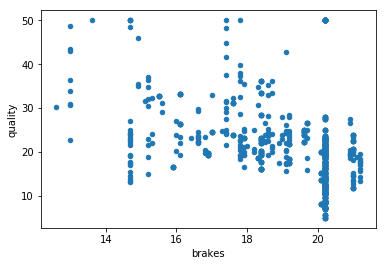

In [11]:
data[['brakes', 'quality']].plot.scatter(x='brakes', y='quality')

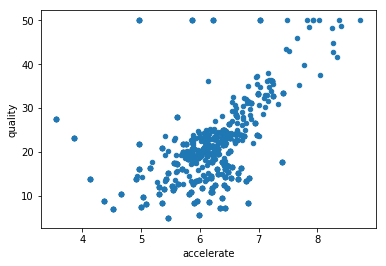

In [12]:
data[['accelerate', 'quality']].plot.scatter(x='accelerate', y='quality')

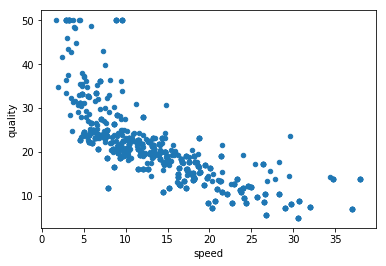

In [13]:
data[['speed', 'quality']].plot.scatter(x='speed', y='quality')

In [ ]:
my_list = data["brakes"].values
my_list  
my_list2 = data["accelerate"].values
my_list2  
my_list3 = data["speed"].values
my_list3  
joined=[my_list]+[my_list2]+[my_list3]
joined=pd.DataFrame(joined)
joined=joined.T
joined[0][0]

In [14]:
data.columns

Index(['accelerate', 'brakes', 'speed', 'quality'], dtype='object')

In [8]:
data.drop(data.columns[[0]], axis=1, inplace=True)
data.head()

,accelerate,brakes,speed,quality
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,6.998,18.7,2.94,33.4
3,7.147,18.7,5.33,36.2
4,6.012,15.2,12.43,22.9


In [9]:
Quality = data['quality']
features = data.drop('quality', axis = 1)
    

In [15]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, Quality,
                                                    train_size=0.8, test_size=0.2,
                                                    random_state=20)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


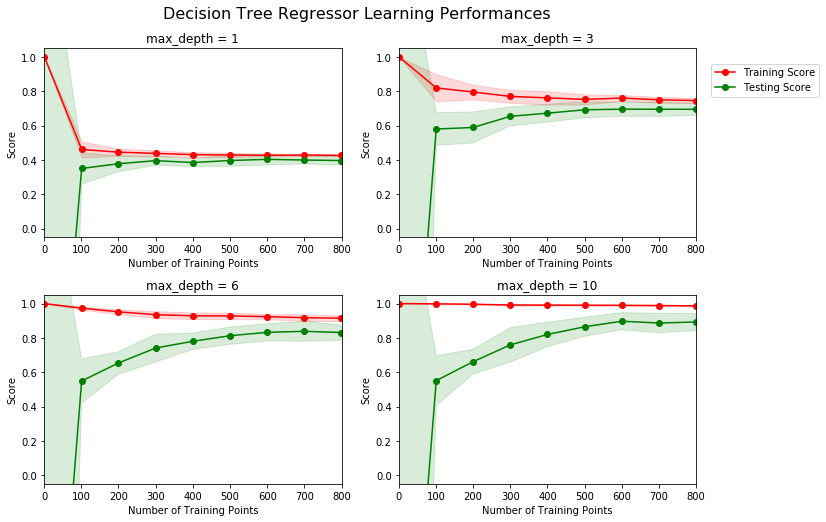

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, Quality)

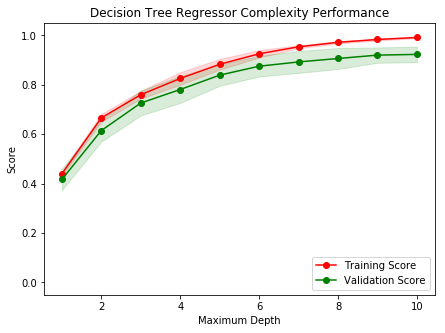

In [17]:
vs.ModelComplexity(X_train, y_train)


In [18]:
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [19]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [20]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

C:\Users\emb-ashwcho\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model.


In [27]:
import matplotlib.pyplot as plt

# Produce a matrix for client data
driver_data = [[5, 17, 15], # driver 1
               [4, 32, 22], # driver  2
               [8, 3, 12]]  # driver  3

# Show predictions
for i, Quality in enumerate(reg.predict(driver_data)):
    #plt.hist(Quality)
    #plt.axvline(Quality)
    #plt.text(Quality-35000, 75, 'Client '+str(i+1), rotation=90)
    print("Predicted Quality for driver {} : {:,.2f}".format(i+1, Quality))

Predicted Quality for driver 1 : 17.50
Predicted Quality for driver 2 : 12.17
Predicted Quality for driver 3 : 22.00


In [68]:
#vs.PredictTrials(features, Quality, fit_model, driver_data)


In [86]:
data.head()

,accelerate,brakes,speed,quality
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,6.998,18.7,2.94,33.4
3,7.147,18.7,5.33,36.2
4,6.012,15.2,12.43,22.9


In [28]:
features

,accelerate,brakes,speed
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,6.998,18.7,2.94
3,7.147,18.7,5.33
4,6.012,15.2,12.43
5,6.377,15.2,20.45
6,6.009,15.2,13.27
7,5.889,15.2,15.71
8,5.949,21.0,8.26
9,6.096,21.0,10.26


In [80]:
data['quality'].describe()

count    200.000000
mean      25.500500
std        8.734162
min       12.700000
25%       19.600000
50%       23.350000
75%       29.525000
max       50.000000
Name: quality, dtype: float64

In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', n_init=10)

In [ ]:
features = 

In [30]:
km.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
x = km.fit_predict(data)
x

array([0, 0, 1, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 0,
       1, 1, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 3, 0, 1, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 2, 3, 2, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 0, 3, 3, 3, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 2, 0, 3, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2,
       2, 0, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [34]:
features["Cluster"]= x
features.head()

,accelerate,brakes,speed,Cluster
0,6.575,15.3,4.98,0
1,6.421,17.8,9.14,0
2,6.998,18.7,2.94,1
3,7.147,18.7,5.33,1
4,6.012,15.2,12.43,0


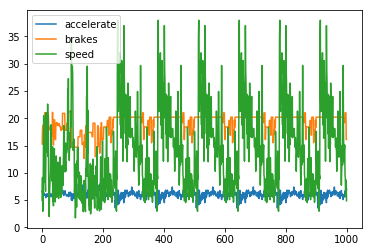

In [32]:
features.plot()

In [35]:
features1 = features.sort_values(['Cluster'])
features1.to_csv("features1cluster1000.csv")